# Sales Prediction - Advertising

> ## **Data Preparetion**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dst = pd.read_csv('/content/drive/MyDrive/DS projects/DataSets/salesprediction.csv')
print(dst.head())
print()
print('shape of the dataframe', dst.shape)
print()
dst.isna().sum()

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

shape of the dataframe (200, 4)



TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
dst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
dst.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [19]:
dst.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


> ## **Data Visualization**

>> ### Scatter Plot

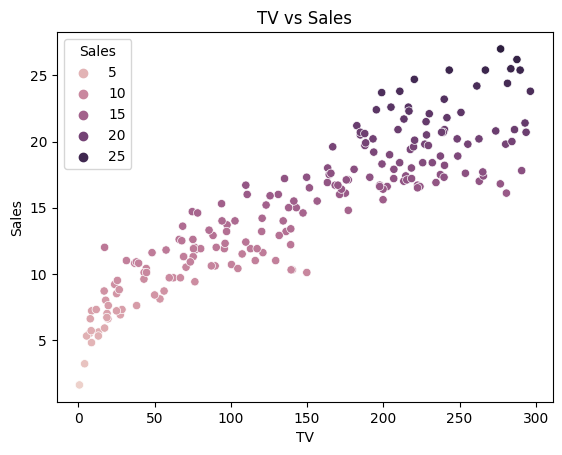

In [10]:
sns.scatterplot(x = dst['TV'],y =dst.Sales, hue = dst.Sales)
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

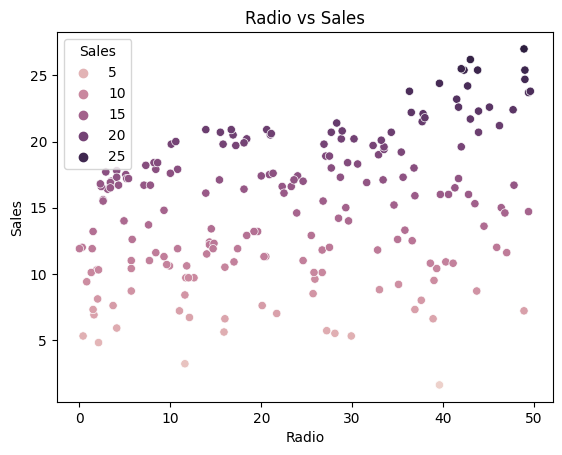

In [11]:
sns.scatterplot(x = dst['Radio'],y =dst.Sales, hue = dst.Sales)
plt.title('Radio vs Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

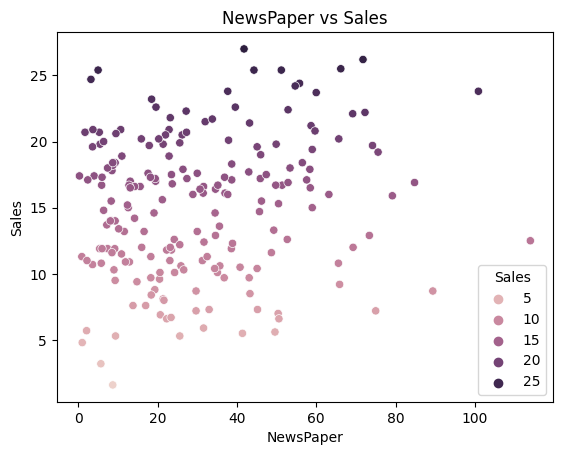

In [12]:
sns.scatterplot(x = dst['Newspaper'],y =dst.Sales, hue = dst.Sales)
plt.title('NewsPaper vs Sales')
plt.xlabel('NewsPaper')
plt.ylabel('Sales')
plt.show()

>> ### Box Plot

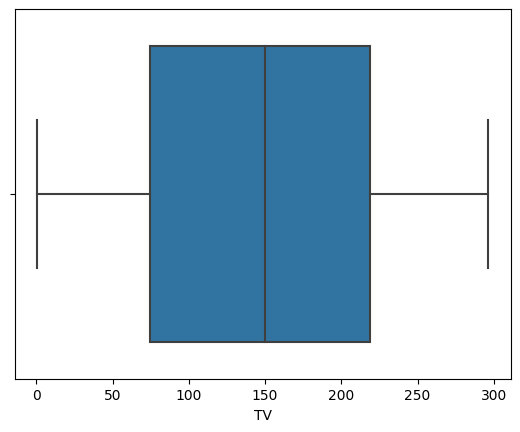

In [23]:
sns.boxplot(x=dst['TV'])
plt.show()

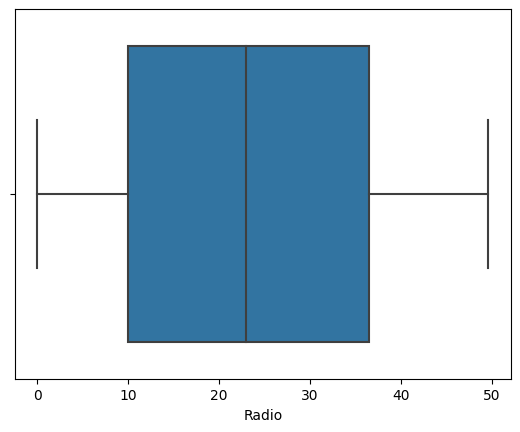

In [14]:
sns.boxplot(x=dst['Radio'])
plt.show()

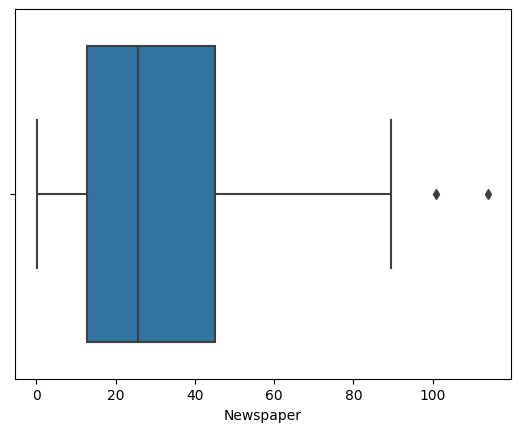

In [17]:
sns.boxplot(x=dst['Newspaper'])
plt.show()

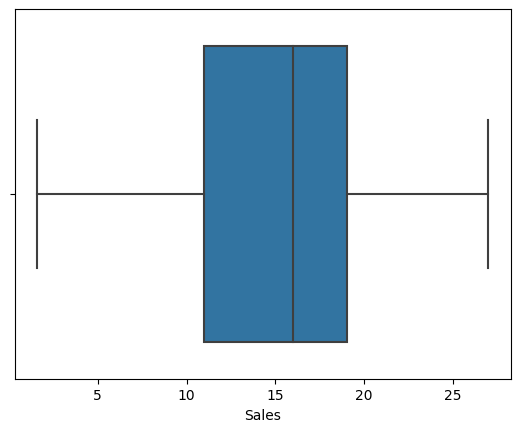

In [18]:
sns.boxplot(x=dst['Sales'])
plt.show()

> ## **The Model**

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
x=dst.drop(['Sales'],axis = 1)
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [26]:
y=dst['Sales']
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [34]:
x1 = dst.iloc[:, :-1].values
y1 = dst.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (160, 3)
Shape of X_test:  (40, 3)
Shape of y_train:  (160,)
Shape of y_test:  (40,)


>> Linear Regression

In [60]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
lr_r2 = r2_score(y_test, lr_y_pred)

print("Accuracy for Multiple Linear Regression is",round(lr_r2*100, 2), '%')

Accuracy for Multiple Linear Regression is 90.59 %


>> Polynomial Regression

In [61]:
polynm_reg = PolynomialFeatures(degree = 3)
X_polynm = polynm_reg.fit_transform(X_train)
poly_regressor = LinearRegression()
poly_regressor.fit(X_polynm, y_train)

X_test_poly = polynm_reg.transform(X_test)
poly_y_pred = poly_regressor.predict(X_test_poly)

r2_poly_reg = r2_score(y_test, poly_y_pred)
print('Accuracy Score for Polynomial Regression is',round(r2_poly_reg*100, 2), '%')

Accuracy Score for Polynomial Regression is 94.14 %


>> Decision Tree Regression

In [62]:
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train, y_train)

dt_y_pred = dt_regressor.predict(X_test)
r2_dt = r2_score(y_test, dt_y_pred)
print('Accuracy Score for Decision Tree Regression is',round(r2_dt*100, 2), '%')

Accuracy Score for Decision Tree Regression is 87.93 %


>> Random Forest Regression

In [70]:
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X_train, y_train)

rf_y_pred = rf_regressor.predict(X_test)
r2_rf = r2_score(y_test, rf_y_pred)
print('Accuracy Score for Random Forest Regression is',round(r2_rf*100, 2), '%')

Accuracy Score for Random Forest Regression is 94.48 %
